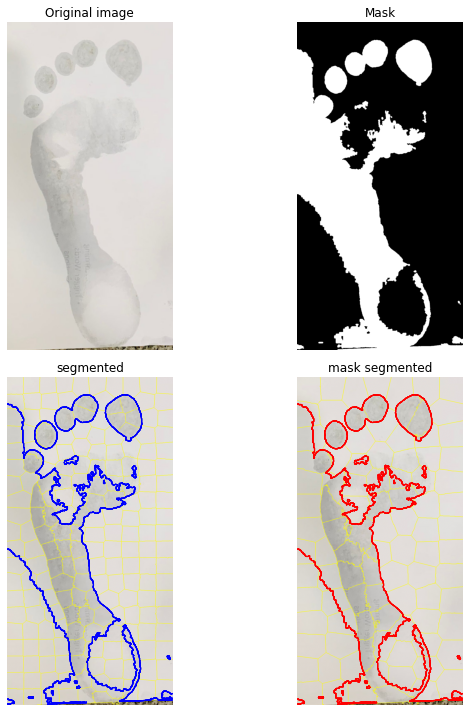

In [1]:
#Solution 1
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation

# Input data
img = plt.imread("/content/drive/MyDrive/foot.jpeg")

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < 0.8255, 100))
mask = morphology.opening(mask, morphology.disk(3))

# SLIC result
slic = segmentation.slic(img, n_segments=200, start_label=1)

# maskSLIC result
m_slic = segmentation.slic(img, n_segments=100, start_label=1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title('Original image')

ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(img, slic))
ax3.contour(mask, colors='blue', linewidths=1)
ax3.set_title('segmented')

ax4.imshow(segmentation.mark_boundaries(img, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('mask segmented')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [70]:
#This is applied practice file ignore this solution
import matplotlib as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
path = '/content/images.jpeg'
img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [71]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts=10

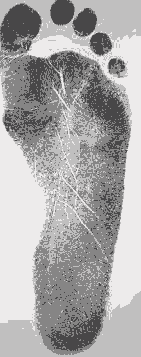

In [72]:
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
cv2_imshow(result_image)

In [61]:
#solution_2
import numpy as np
import cv2
from matplotlib import pyplot as plt

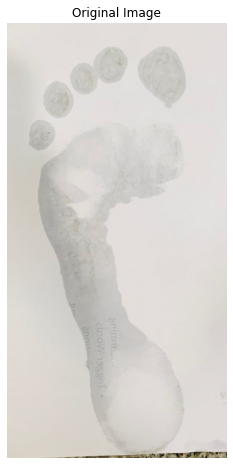

In [62]:
img = cv2.imread('/content/foot.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("Original Image")
plt.show()


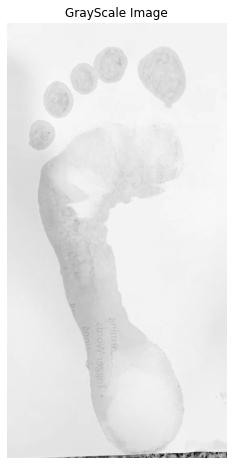

In [63]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(gray,cmap="gray")
plt.axis('off')
plt.title("GrayScale Image")
plt.show()

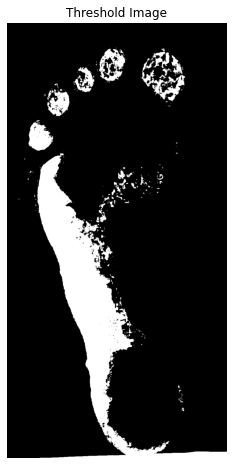

In [64]:
ret, thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
plt.figure(figsize=(8,8))
plt.imshow(thresh,cmap="gray")
plt.axis('off')
plt.title("Threshold Image")
plt.show()

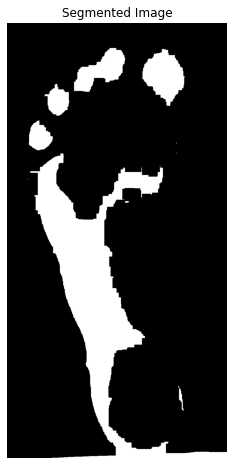

In [65]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,kernel, iterations = 15)
bg = cv2.dilate(closing, kernel, iterations = 1)
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.02*dist_transform.max(), 255, 0)
#cv2_imshow('image')
plt.figure(figsize=(8,8))
plt.imshow(fg,cmap="gray")
plt.axis('off')
plt.title("Segmented Image")
plt.show()

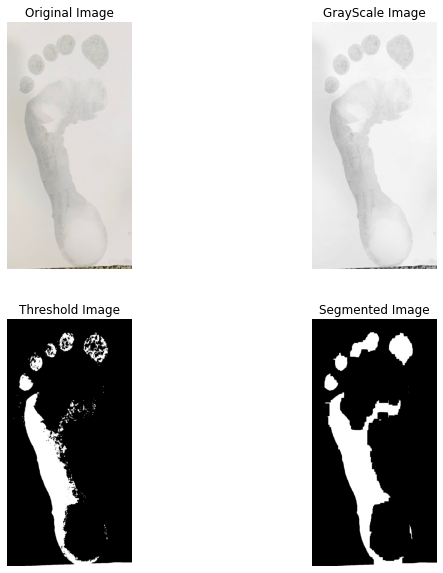

In [66]:
plt.figure(figsize=(10,10))
 
plt.subplot(2,2,1)
plt.axis('off')
plt.title("Original Image")
plt.imshow(img,cmap="gray")
 
plt.subplot(2,2,2)
plt.imshow(gray,cmap="gray")
plt.axis('off')
plt.title("GrayScale Image")
 
plt.subplot(2,2,3)
plt.imshow(thresh,cmap="gray")
plt.axis('off')
plt.title("Threshold Image")
 
plt.subplot(2,2,4)
plt.imshow(fg,cmap="gray")
plt.axis('off')
plt.title("Segmented Image")
 
plt.show()